# Introduce R console and show basic computations and objects with naming conventions

## The R Console

The R console provides our first intro to code in R. The image below shows what the console will look like when you open it. You should see a blinking cursor - this where we can write our first line of code!

<img src="images/1-r-console.png" alt= “” width="400pt" align="center">

To start, type `2+3` and press ENTER. You should see that `5` is printed below that code and that your cursor is moved to the next line. 

## Basic Computations and Objects

In the example above, we coded a simple addition. Try out some other basic calculations using the operators below:

* Addition: `5+6`  
* Subtraction: `7-2`  
* Multiplication: `2*3`  
* Division: `6/3`  
* Exponentiation: `4^2`  
* Modulo: `100 %% 4`

For example, use the modulo operator to find what 100 mod 4 is. It should return 0 since 100 is divisible by 4.

If we want to save the result of any computation, we need to create an object to store our value of interest. An **object** is simply a named data structure that allows us to reference that data structure. Objects are also commonly called **variables**. In the code below, we create an object `x` which stores the value `5` using the assignment operator `<-`. The assignment operator assigns whatever is on the right hand side of the operator to the name on the left hand side. We can now reference `x` by calling its name. Additionally, we can update its value by adding 1. In the second line of code, the computer first finds the value of the right hand side by finding the current value of `x` before adding 1 and assigning it back to `x`.

In [314]:
x <- 2+3
x <- x+1
x

[1] 6

We can create and store multiple objects by using different names. The code below creates a new object `y` that is one more than the value of `x`. We can see that the value of `x` is still `5` after running this code.

In [315]:
x <- 2+3
y <- x
y <- y + 1
x

[1] 5

## Naming Conventions

As we start creating objects, we want to make sure we use good object names. Here are a few tips for naming objects effectively:

*  Stick to a single format. We will use **snake_case**, which uses underscores between words (e.g. `my_var`, `class_year`).
*  Make your names useful. Try to avoid using names that are too long (e.g. `which_day_of_the_week`) or do not contain enough information (e.g., `x1`, `x2`, `x3`). 
*  Replace unexplained values with an object. For example, if you need to do some calculations using 100 as the number of participants, create an object `n_part` with value 100 rather than repeatedly using the number. This makes the code easy to update and helps the user avoid possible errors. 

# Work with data files and get paths

## Working Directories and Paths

Let's try using another example function: `read.csv()`. This function reads in a comma-delimited file and returns the information as a data frame (try typing `?read.csv` in the console to read more about this function). We will learn more about data frames in [Chapter 2](https://alicepaul.github.io/r-for-health-data-science/book/2_data_structures.html). The first argument to this function is a file, which can be expressed as either a filename or a path to a file. First, download the file `fake_names.csv` from this book's [github repository](https://github.com/alicepaul/r-for-health-data-science/tree/main/book/data). By default, R will look for the file in your current working directory. To find the working directory, you can run `getwd()`. You can see below that my current working directory is where the book content is on my computer. 

In [316]:
getwd()

[1] "/Users/Murphy1/Desktop/Summer_Research/r-for-health-data-science/book"

You can either move the .csv file to your current working directory and load it in, or you can specify the path to the .csv file. Another option is to update your working directory by using the `setwd()` function (e.g. `setwd('/Users/Alice/Dropbox/r-for-health-data-science/book/data')`). If you receive an error that a file cannot be found, you most likely have the wrong path to the file or the wrong file name. Below, I chose to specify the path to the downloaded .csv file, saved this file to an object called `df`, and then printed that `df` object.

In [317]:
df <- read.csv("data/fake_names.csv") # you will need to update this with the path to your file
df

Name,Age,DOB,City,State
<chr>,<int>,<chr>,<chr>,<chr>
Ken Irwin,37,6/28/85,Providence,RI
Delores Whittington,56,4/28/67,Smithfield,RI
Daniel Hughes,41,5/22/82,Providence,RI
Carlos Fain,83,2/2/40,Warren,RI
James Alford,67,2/23/56,East Providence,RI
Ruth Alvarez,34,9/22/88,Providence,RI


We can see that `df` contains the information from the .csv file and that R has printed the first few observations of the data. 

# Install packages and load them

## Installing and Loading Packages

When working with data frames, we will often use the `tidyverse` package (https://www.tidyverse.org/), which is actually a collection of R packages for data science applications. An R package is a collection of functions and/or sample data that allow us to expand on the functionality of R beyond the base functions. You can check whether you have the `tidyverse` package installed by going to the package pane in RStudio or by running the command below, which will display all your installed packages. 

`installed.packages()`

If you don't already have a package installed, you can install it using the `install.packages()` function. Note that you have to include single or double quotes around the package name when using this function. You only have to install a package one time.

`install.packages('tidyverse')`

The function `read_csv()` is another function to read in comma-delimited files that is part of the `readr` package in the tidyverse. However, if we tried to use this function to load in our data, we would get an error that the function cannot be found. That is because we haven't loaded in this package. To do so, we use the `library()` function. Unlike the `install.packages()` function, we do not have to use quotes around the package name when calling this `library()` function. When we load in a package, we will see some messages. For example, below we see that this package contains the functions `filter()` and `lag()` that are also functions in base R. In future chapters, we will suppress these messages to make the chapter presentation nicer. After loading the tidyverse package, we can now use the `read_csv()` function as shown below.

In [318]:
library(tidyverse)

In [319]:
df <- read_csv("data/fake_names.csv", show_col_types=FALSE)
df

Name,Age,DOB,City,State
<chr>,<dbl>,<chr>,<chr>,<chr>
Ken Irwin,37,6/28/85,Providence,RI
Delores Whittington,56,4/28/67,Smithfield,RI
Daniel Hughes,41,5/22/82,Providence,RI
Carlos Fain,83,2/2/40,Warren,RI
James Alford,67,2/23/56,East Providence,RI
Ruth Alvarez,34,9/22/88,Providence,RI


Alternatively, we could have told R where to locate the function by adding `readr::` before the function. This tells it to find `read_csv` function in the `readr` package. This can be helpful even if we have already loaded in the package, since sometimes multiple packages have functions with the same name. 

In [320]:
df <- readr::read_csv("data/fake_names.csv", show_col_types = FALSE)

# Introduce key data structures and data types with examples

## Data Structure

In this chapter, we will demonstrate the key **data structures** in R. Data structures are how information is stored in R, and the data structures that we use inform R how to interpret our code. Any **object** is a named instance of a data structure. For example, the object `ex_num` below is a vector of numeric type. 

In [321]:
ex_num <- 4

The main data structures in R are **vectors**, **factors**, **matrices**, **arrays**, **lists**, and **data frames**. These structures are distinguished by their dimensions and by the type of data they store. For example, we might have a 1-dimensional vector that contains all numeric values, or we could have a 2-dimensional data frame with rows and columns where we might have one numeric column and one character column. In the image below, there are two vectors with different types (character and numeric) on top and then a matrix and data frame below. In this chapter, we will cover each data structure except for arrays. Arrays are an extension of matrices that allow for data that is more than 2-dimensional and are not needed for the applications covered in this book.

<img src="images/2-data-structures.png" alt= “” width="500pt" align="center">

## Data Types

Each individual value in R has a type: logical, integer, double, or character. We can think of these as the building blocks of all data structures. Below, we can use the `typeof` function to find the type of our vector from above, which shows that the value of `ex_num` is a **double**. A double is a numeric value with a stored decimal.

In [322]:
typeof(ex_num)

[1] "double"

On the other hand, an integer is a whole number that does not contain a decimal. We now create an integer object `ex_int`. To indicate to R that we want to restrict our values to integer values, we use an `L` after the number. 

In [323]:
ex_int <- 4L
typeof(ex_int)

[1] "integer"

Both `ex_num` and `ex_int` are numeric objects, but we can also work with two other types of objects: characters (e.g. "php", "stats") and booleans (e.g. TRUE, FALSE), also known as logicals. 

In [324]:
ex_bool <- TRUE
ex_char <- "Alice"

typeof(ex_bool)
typeof(ex_char)

[1] "logical"

[1] "character"

One important characteristic of logical objects is that R will also interpret them as 0/1. This means they can be added as in the example below: each `TRUE` has a value of 1 and each `FALSE` has a value of 0.

In [325]:
TRUE+FALSE+TRUE

[1] 2

To create all of the above objects, we used the assignment operator `<-`, which we discussed in [Chapter 1](https://alicepaul.github.io/r-for-health-data-science/book/1_intro_to_r.html). You may see code elsewhere that uses an `=` instead. While `=` can also be used for assignment, it is more standard practice to use `<-`. 

## Vectors

In the examples above, we created objects with a single value. R actually uses a vector of length 1 to store this information. **Vectors** are 1-dimensional data structures that can store multiple data values of the same type (e.g. character, boolean, or numeric). 


<img src="images/2-vectors.png" alt= “” width="500pt" align="center">

We can confirm this by using the `is.vector()` function, which returns whether or not the inputted argument is a vector.

In [326]:
is.vector(ex_bool)

[1] TRUE

One way to create a vector with multiple values is to use the combine function `c()`. Below we create two vectors: one with the days of the week and one with the amount of rain on each day. The first vector has all character values, and the second one has all numeric values.

In [327]:
days <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday")
rain <- c(5, 0.1, 0, 0, 0.4)

Remember, vectors cannot store objects of different types. Because of this, in the code below, R automatically converts the numeric value to be a character in order to store these values in a vector together.

In [328]:
c("Monday", 5)

[1] "Monday" "5"

The `class()` function returns the data structure of an object. If we check the classes of these two objects using the `class()` function, we will see that R tells us that the first is a character vector and the second is a numeric vector. This matches the data type in this case. 

class(days)
class(rain)

What happens when we create an empty vector? What is the class?

In [329]:
ex_empty <- c()
class(ex_empty)

[1] "NULL"

In this case, there is no specified type yet. If we wanted to specify the type, we could make an empty vector using the `vector()` function.

In [330]:
ex_empty <- vector(mode = "numeric")
class(ex_empty)

[1] "numeric"

Another way to create a vector is with the `rep()` or `seq()` functions. The first function `rep(x, times)` takes in a vector `x` and a number of times `times` and outputs `x` repeated that many times. Let's try this with a single value below. The second function `seq(from, to, step)` takes in a numeric starting value `from`, end value `to`, and step size `step` and returns a sequence from `from` in increments of `step` until a maximum value of `to` is reached. 

In [331]:
rep(0, 5)
rep("Monday", 4)
seq(1, 5, 1)
seq(0, -10, -2)

[1] 0 0 0 0 0

[1] "Monday" "Monday" "Monday" "Monday"

[1] 1 2 3 4 5

[1]   0  -2  -4  -6  -8 -10

# Basic computations and indexing methods

## Indexing a Vector

Once we have a vector, we may want to access certain values stored in that vector. To do so, we index the vector using the position of each value: the first value in the vector has index 1, the second value has index 2, etc. When we say a vector is 1-dimensional, we mean that we can define the position of each value by a single index. To index the vector, we then use square brackets `[]` after the vector name and provide the position. Below, we use these indices to find the value at index 1 and the value at index 4.

In [332]:
days[1]
days[4]

[1] "Monday"

[1] "Thursday"

We can either access a single value or a subset of values using a vector of indices. Let's see what happens when we use a vector of indices `c(1,4)` and then try using `-c(1,4)` and see what happens then. In the first case, we get the values at index 1 *and* at index 4. In the second case, we get all values *except* at those indices. The `-` indicates that we want to remove rather than select these indices.

In [333]:
days[c(1,4)]
days[-c(1,4)]

[1] "Monday"   "Thursday"

[1] "Tuesday"   "Wednesday" "Friday"

However, always indexing by the index value can sometimes be difficult or inefficient. One extra feature of vectors is that we can associate a name with each value. Below, we update the names of the vector `rain` to be the days of the week and then find Friday's rain count by indexing with the name.

In [334]:
names(rain) <- days
print(rain)
rain["Friday"]

   Monday   Tuesday Wednesday  Thursday    Friday 
      5.0       0.1       0.0       0.0       0.4 


Friday 
   0.4

The last way to index a vector is to use TRUE and FALSE values. If we have a vector of booleans that is the same length as our original vector, then this will return all the values that correspond to a TRUE value. For example, indexing the `days` vector by the logical vector `ind_bools` below will return its first and fourth values. We will see more about using logic to access certain values later on. 

In [335]:
ind_bools <- c(TRUE, FALSE, FALSE, TRUE, FALSE)
days[ind_bools]

[1] "Monday"   "Thursday"

## Editing a Vector and Calculations

The mathematical operators we saw in the last chapter (`+`, `-`, `*`, `/`, `^`, `%%`) can all be applied to numeric vectors and will be applied element-wise. That is, in the code below, the two vectors are added together by index. This holds true for some of the built-in math functions as well:

* `exp()` - expoential
* `log()` - log
* `sqrt()` - square root
* `abs()` - absolute value 
* `round()` - round to nearest integer value
* `ceiling()` - round up to the nearest integer value 
* `floor()` - round down to the nearest integer value

In [336]:
c(1,2,3) + c(1,1,1)
c(1,2,3) + 1 # equivalent to the code above
sqrt(c(1,4,16))

[1] 2 3 4

[1] 2 3 4

[1] 1 2 4

After we create a vector, we may need to update its values. For example, we may want to change a specific value. We can do so using indexing. Below, we update the rain value for Friday using the assignment operator. 

In [337]:
rain["Friday"] <- 0.5
rain

Monday   Tuesday Wednesday  Thursday    Friday 
      5.0       0.1       0.0       0.0       0.5

Further, we may need to add extra entries. We can do so using the `c()` function again but this time passing in the vector we want to add to as our first argument. This will create a single vector with all previous and new values. Below, we add two days to both vectors and then check the length of the updated vector `rain`. The `length()` function returns the length of a vector.

In [338]:
length(rain)
days <- c(days,"Saturday","Sunday") # add the weekend with no rain
rain <- c(rain,0,0)
length(rain)

[1] 5

[1] 7

We can also call some useful functions on vectors. For example, the `sum()`, `max()`, and `min()` functions will return the sum, maximum value, and minimum value of a vector, respectively. 

# Summary functions of numeric columns and other statistical values

In [339]:
library(RforHDSdata)

## Summarizing and Creating Data Columns

We will now look at the data we have loaded into the data frame called `pain`. We use the `head()` function to print the first six rows. However, note that we have so many columns that all not of the columns are displayed! For those that are displayed, we can see the data type for each column under the column name. For example, we can see that the column `PATIENT_NUM` is a numeric column of type `dbl`. Because patients identification numbers are technically nominal in nature, we might consider whether we should make convert this variable to a factor or a character representation later on. We can use the `names()` function to print all the column names. Note that columns `X101` to `X238` correspond to numbers on a body pain map (see the data documentation for the image of this map). Each of these columns has a 1 if the patient indicated that they have pain in that corresponding body part and a 0 otherwise.

In [340]:
head(pain)
names(pain)

PATIENT_NUM,X101,X102,X103,X104,X105,X106,X107,X108,X109,⋯,PAIN_INTENSITY_AVERAGE.FOLLOW_UP,PAT_SEX,PAT_RACE,CCI_BIN,MEDICAID_BIN,NUM_REGIONS,LOWER_BACK,PAIN_CHANGE,PERC_PAIN_CHANGE,BACK
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
13118,0,0,0,0,0,0,0,0,0,⋯,2,male,WHITE,No comorbidity,No Medicaid,4,0,-5,-0.7142857,TRUE
21384,0,0,0,0,0,0,0,0,0,⋯,5,female,WHITE,No comorbidity,No Medicaid,5,0,0,0.0000000,TRUE
6240,0,0,0,0,0,0,0,0,0,⋯,6,male,WHITE,No comorbidity,No Medicaid,3,0,2,0.5000000,TRUE
1827,0,0,0,0,0,0,0,0,0,⋯,7,male,WHITE,No comorbidity,No Medicaid,4,1,0,0.0000000,TRUE
11309,0,0,0,0,0,0,0,0,0,⋯,6,male,WHITE,No comorbidity,No Medicaid,13,1,-2,-0.2500000,TRUE
11093,0,0,0,0,0,0,0,0,0,⋯,0,male,WHITE,No comorbidity,NA,24,1,-8,-1.0000000,TRUE


[1] "PATIENT_NUM"                      "X101"                            
 [3] "X102"                             "X103"                            
 [5] "X104"                             "X105"                            
 [7] "X106"                             "X107"                            
 [9] "X108"                             "X109"                            
[11] "X110"                             "X111"                            
[13] "X112"                             "X113"                            
[15] "X114"                             "X115"                            
[17] "X116"                             "X117"                            
[19] "X118"                             "X119"                            
[21] "X120"                             "X121"                            
[23] "X122"                             "X123"                            
[25] "X124"                             "X125"                            
[27] "X126"                             "X127"                            
[29] "X128"                             "X129"                            
[31] "X130"                             "X131"                            
[33] "X132"                             "X133"                            
[35] "X134"                             "X135"                            
[37] "X136"                             "X201"                            
[39] "X202"                             "X203"                            
[41] "X204"                             "X205"                            
[43] "X206"                             "X207"                            
[45] "X208"                             "X209"                            
[47] "X210"                             "X211"                            
[49] "X212"                             "X213"                            
[51] "X214"                             "X215"                            
[53] "X216"                             "X217"                            
[55] "X218"                             "X219"                            
[57] "X220"                             "X221"                            
[59] "X222"                             "X223"                            
[61] "X224"                             "X225"                            
[63] "X226"                             "X227"                            
[65] "X228"                             "X229"                            
[67] "X230"                             "X231"                            
[69] "X232"                             "X233"                            
[71] "X234"                             "X235"                            
[73] "X236"                             "X237"                            
[75] "X238"                             "PAIN_INTENSITY_AVERAGE"          
[77] "PROMIS_PHYSICAL_FUNCTION"         "PROMIS_PAIN_BEHAVIOR"            
[79] "PROMIS_DEPRESSION"                "PROMIS_ANXIETY"                  
[81] "PROMIS_SLEEP_DISTURB_V1_0"        "PROMIS_PAIN_INTERFERENCE"        
[83] "GH_MENTAL_SCORE"                  "GH_PHYSICAL_SCORE"               
[85] "AGE_AT_CONTACT"                   "BMI"                             
[87] "CCI_TOTAL_SCORE"                  "PAIN_INTENSITY_AVERAGE.FOLLOW_UP"
[89] "PAT_SEX"                          "PAT_RACE"                        
[91] "CCI_BIN"                          "MEDICAID_BIN"                    
[93] "NUM_REGIONS"                      "LOWER_BACK"                      
[95] "PAIN_CHANGE"                      "PERC_PAIN_CHANGE"                
[97] "BACK"

Recall that the `$` operator can be used to access a single column. Alternatively, we can use double brackets `[[]]` to select a column. Below, we demonstrate both ways to print the first five values in the column with the patient's average pain intensity.

In [341]:
pain$PAIN_INTENSITY_AVERAGE[1:5]
pain[["PAIN_INTENSITY_AVERAGE"]][1:5]

[1] 7 5 4 7 8

[1] 7 5 4 7 8

## Column Summaries

To explore the range and distribution of a column's values, we can use some of the base R functions. For example, the `summary()` function is a useful way to summarize a numeric column's values. Below, we can see that the pain intensity values range from 0 to 10 with a median value of 7 and that there is 1 NA value.

In [342]:
summary(pain$PAIN_INTENSITY_AVERAGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.000   7.000   6.486   8.000  10.000 

We have already seen the `max()`, `min()`, `mean()`, and `median()` functions that could have computed some of these values for us separately. Since we do have an NA value, we add the `na.rm=TRUE` argument to these functions. Without this argument, the returned value for all of the functions will be NA. 

In [343]:
min(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
max(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
mean(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)
median(pain$PAIN_INTENSITY_AVERAGE, na.rm=TRUE)

[1] 0

[1] 10

[1] 6.485547

[1] 7

Additionally, the functions below are helpful for summarizing quantitative variables.

* `range()` - returns the minimum and maximum values for a numeric vector x
* `quantile()` - returns the sample quantiles for a numeric vector
* `IQR()` - returns the interquartile range for a numeric vector

By default, the `quantile()` function returns the sample quartiles. 

In [344]:
quantile(pain$PAIN_INTENSITY_AVERAGE, na.rm = TRUE)

0%  25%  50%  75% 100% 
   0    5    7    8   10

However, we can pass in a list of probabilities to use instead. For example, below we find the 0.1 and 0.9 quantiles. Again, we add the `na.rm=TRUE` argument. 

In [345]:
quantile(pain$PAIN_INTENSITY_AVERAGE, probs = c(0.1, 0.9), na.rm=TRUE)

10% 90% 
  4   9

We can also plot a histogram of the sample distribution using the `hist()` function. We will look more in depth at how to change aspects of this histogram in [Chapter 4](https://alicepaul.github.io/r-for-health-data-science/book/4_exploratory_analysis.html).

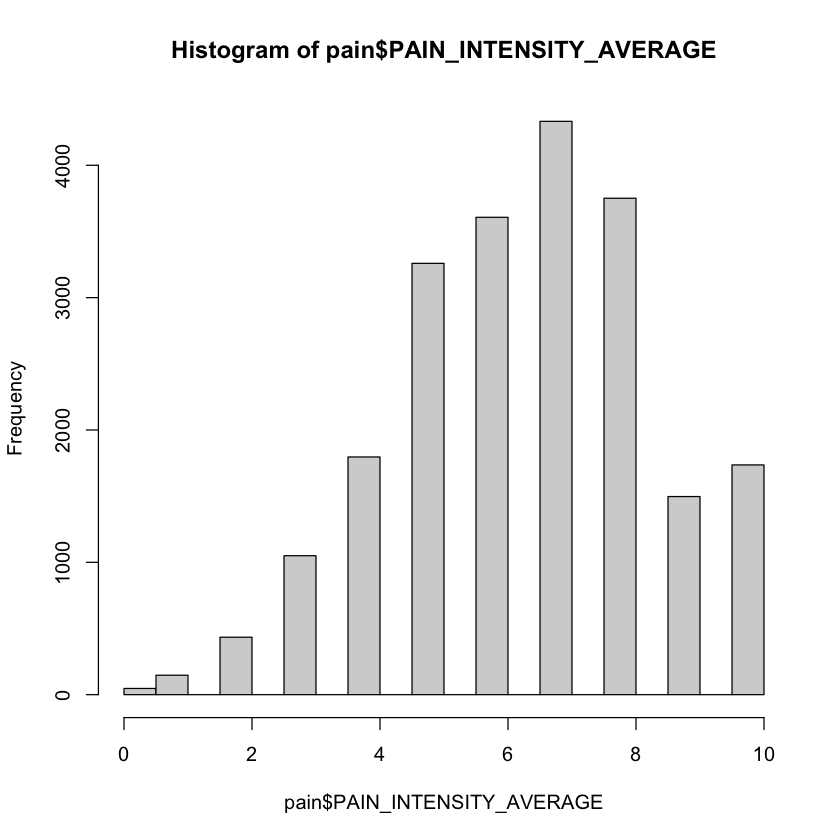

In [346]:
hist(pain$PAIN_INTENSITY_AVERAGE)

# Demonstrate apply() function and compare to summary functions

## Other Summary Functions

Sometimes we want to summarize information across multiple columns or rows. We can use the `rowSums()` and `colSums()` functions to sum over the rows or columns of a matrix or data frame. We first subset the data to the body pain map regions. In the first line of code, I select the column names pertaining to these variables. This allows me to select those columns in the second line of code and store this subset of the data as a new data frame called `pain_body_map`.

In [347]:
body_map_cols <- names(pain)[2:75]
pain_body_map <- pain[, body_map_cols]
head(pain_body_map)

X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,⋯,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,1,0,0,0,1
0,0,0,0,0,0,0,0,0,1,⋯,0,0,1,0,1,0,1,0,1,0


I now compute the row sums and column sums on this subset of data. The row sum for each patient is the total number of body parts in which they experience pain, whereas the column sum for each pain region is the total number of patients who experience pain in that area. The histogram below shows that most people select a low number of total regions.

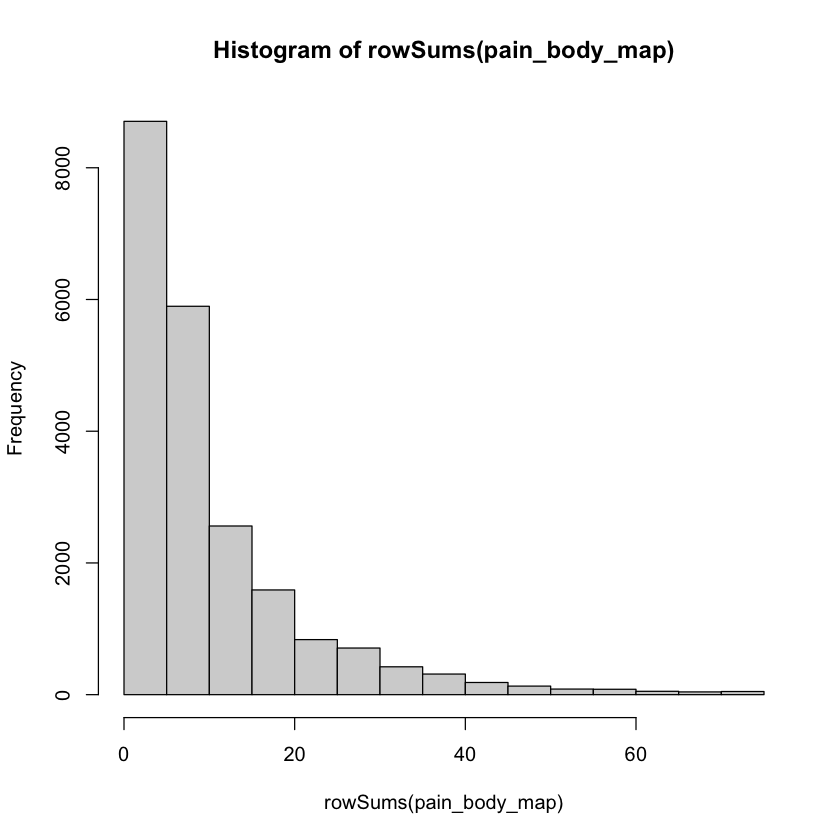

In [348]:
hist(rowSums(pain_body_map))

We can also see that some body parts are more often selected than others. We create a vector called `perc_patients` below by finding the number of patients who selected each region divided by the total number of patients. The histogram shows that some body regions are selected by over 50% of patients!

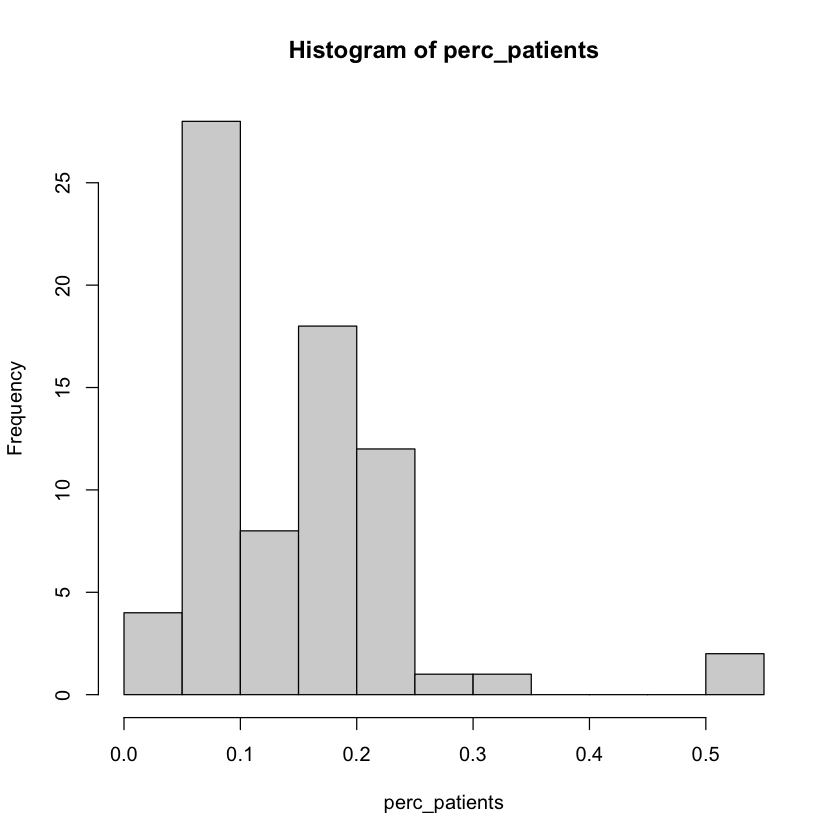

In [349]:
perc_patients <- colSums(pain_body_map, na.rm=TRUE)/nrow(pain_body_map)
hist(perc_patients)

We use the `which.max()` function to see that the 55th region `X219` is selected the most number of times. This corresponds to lower back pain.

In [350]:
which.max(perc_patients)

X219 
  55

Another pair of useful functions are `pmin()` and `pmax()`. These functions take at least two vectors and find the pairwise minimum of maximum across those vectors, as shown below. For example, suppose you had two vectors, 

In [351]:
v1 = c(5, 9, 12)
v2 = c(2, 18, 4)
pmax(v1, v2)  

[1]  5 18 12

Looking back at the `pain` data, if we want to create a new variable `lower_back_pain` that corresponds to whether someone selects *either* X218 or X219 we can use the `pmax()` function to find the maximum value between columns `X218` and `X219`. We can see that almost 60% of patients select at least one of these regions.

In [352]:
lower_back <- pmax(pain_body_map$X218, pain_body_map$X219)
prop.table(table(lower_back))

lower_back
        0         1 
0.4053842 0.5946158 

We might want to store the total number of pain regions and our indicator of whether or not a patient has lower back pain as new columns. We use our code above to create new columns in the pain data using the `$` operator. To be consistent with the variable naming in the data, we use all upper case for our variable names. The `dim()` function shows that our data has grown by two columns, as expected. We might want to store the total number of pain regions and our indicator of whether or not a patient has lower back pain as new columns. We use our code above to create new columns in the pain data using the `$` operator. To be consistent with the variable naming in the data, we use all upper case for our variable names. The `dim()` function shows that our data has grown by two columns, as expected. 

In [353]:
pain$NUM_REGIONS <- rowSums(pain_body_map)
pain$LOWER_BACK <- lower_back
dim(pain)

[1] 21656    97

Another useful function that allows us to perform computations over the rows or columns of a matrix or data frame is the `apply(X, MARGIN, FUN)` function, which takes in three arguments. The first agrument is a data frame or matrix `X`, the second argument `MARGIN` indicates whether to compute over the rows (`1`) or columns (`2`), and the last argument is the function `FUN` to apply across that margin. The first example below finds the maximum value for each row in the data frame `pain_body_map`. Taking the minimum value of the row maximum values shows that every patient selected at least one body map region. In the second example, we find the sum of the body pain regions over the columns, which is equivalent to the example using `colSums()` above. In this case, we added the `na.rm=TRUE` argument. The `apply()` function will pass additional arguments to the function `FUN`. 

In [354]:
any_selected <- apply(pain_body_map, 1, max)
min(any_selected, na.rm=TRUE)

[1] 1

In [355]:
perc_patients <- apply(pain_body_map, 2, sum, na.rm=TRUE)/nrow(pain_body_map)
summary(perc_patients)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03228 0.06967 0.13622 0.14377 0.18128 0.54193 

# Ways to check missing values and remove them 

## Missing values, Infinite values, and NaN values

As we saw above, this data contains some missing values, which are represented as `NA` in R. R treats these values as if they were unknown, which is why we have to add the `na.rm=TRUE` argument to functions like `sum()` and `max()`. In the example below, we can see that R figures out that 1 plus an unknown number is also unknown!

In [356]:
NA+1

[1] NA

We can determine whether a value is missing using the function `is.na()`. This function returns `TRUE` if the value is NA and `FALSE` otherwise. We can then sum up these values for a single column, since each `TRUE` value corresponds to a value of 1 and each `FALSE` corresponds to a value of 0. Below we can see that there is a single NA value for the column `PATIENT_NUM`, which is the patient ID number.

In [357]:
sum(is.na(pain$PATIENT_NUM))

[1] 0

If we want to calculate the sum of NA values for each column instead of just a single column, we can use the `apply` function. Since we want to apply this computation over the columns, the second argument has value 2. Recall that the last argument is the function we want to call for each column. In this case, we want to apply the combination of the `sum()` and `is.na()` function. To do so, we have to specify this function ourselves. This is called an **anonymous function** since it doesn't have a name. 

In [358]:
num_missing_col <- apply(pain, 2, function(x) sum(is.na(x)))
min(num_missing_col)

[1] 0

Interestingly, we can see that there is at least one missing value in each column. It might be the case that there is a row with all NA values. Let's apply the same function by row. Taking the maximum, we can see that row 11749 has all NA values.

In [359]:
num_missing_row <- apply(pain, 1, function(x) sum(is.na(x)))
max(num_missing_row)
which.max(num_missing_row)

[1] 11

[1] 7436

We remove that row and then find the percentage of missing values by column. We can see that the column with the highest percentage of missing values is the pain intensity at follow-up. In fact, only 33% of patients have a recorded follow-up visit. 

In [360]:
pain <- pain[-11749,]
num_missing_col <- apply(pain, 2, function(x) sum(is.na(x))/nrow(pain))
num_missing_col

PATIENT_NUM                             X101 
                     0.000000000                      0.000000000 
                            X102                             X103 
                     0.000000000                      0.000000000 
                            X104                             X105 
                     0.000000000                      0.000000000 
                            X106                             X107 
                     0.000000000                      0.000000000 
                            X108                             X109 
                     0.000000000                      0.000000000 
                            X110                             X111 
                     0.000000000                      0.000000000 
                            X112                             X113 
                     0.000000000                      0.000000000 
                            X114                             X115 
                     0.000000000                      0.000000000 
                            X116                             X117 
                     0.000000000                      0.000000000 
                            X118                             X119 
                     0.000000000                      0.000000000 
                            X120                             X121 
                     0.000000000                      0.000000000 
                            X122                             X123 
                     0.000000000                      0.000000000 
                            X124                             X125 
                     0.000000000                      0.000000000 
                            X126                             X127 
                     0.000000000                      0.000000000 
                            X128                             X129 
                     0.000000000                      0.000000000 
                            X130                             X131 
                     0.000000000                      0.000000000 
                            X132                             X133 
                     0.000000000                      0.000000000 
                            X134                             X135 
                     0.000000000                      0.000000000 
                            X136                             X201 
                     0.000000000                      0.000000000 
                            X202                             X203 
                     0.000000000                      0.000000000 
                            X204                             X205 
                     0.000000000                      0.000000000 
                            X206                             X207 
                     0.000000000                      0.000000000 
                            X208                             X209 
                     0.000000000                      0.000000000 
                            X210                             X211 
                     0.000000000                      0.000000000 
                            X212                             X213 
                     0.000000000                      0.000000000 
                            X214                             X215 
                     0.000000000                      0.000000000 
                            X216                             X217 
                     0.000000000                      0.000000000 
                            X218                             X219 
                     0.000000000                      0.000000000 
                            X220                             X221 
                     0.000000000                      0.000000000 
                            X222                             X223 
                     0.000000000                      0.000000000 
 

We will create two new columns: first, we create a column for the change in pain at follow-up, and second, we create a column which is the percent change in pain at follow-up. 

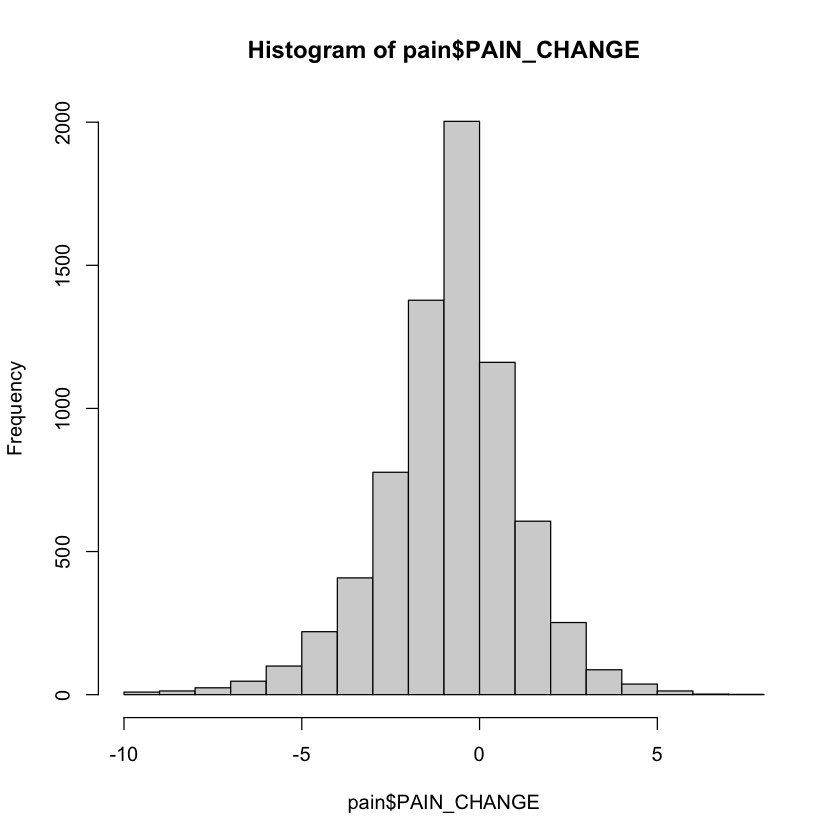

In [361]:
pain$PAIN_CHANGE <- pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP - pain$PAIN_INTENSITY_AVERAGE
hist(pain$PAIN_CHANGE)

In [362]:
pain$PERC_PAIN_CHANGE <- pain$PAIN_CHANGE/pain$PAIN_INTENSITY_AVERAGE
summary(pain$PERC_PAIN_CHANGE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -1.000  -0.200   0.000     Inf   0.143     Inf   14517 

In the summary of the percent change, we can see that the maximum value is `Inf`. This is R's representation of infinity. This occurred because some patients have an intial pain score of 0, which creates infinite values when we divide through by this value to find the percent change. We can test whether something is infinite using the `is.infinite()` or `is.finite()` functions. This shows that there were three patients with infinite values. The value `-Inf` is used to represent negative infinity.

In [363]:
sum(is.infinite(pain$PERC_PAIN_CHANGE))

[1] 3

Another special value in R is `NaN`, which stands for "Not a Number". For example, `0/0` will result in a NaN value. We can test for `NaN` values using the `is.nan()` function.

In [364]:
0/0

[1] NaN

Looking back at the missing values, there are two useful functions for selecting the complete cases in a data frame. The `na.omit()` function returns the data frame with incomplete cases removed, whereas `complete.cases()` returns TRUE/FALSE values for each row indicating whether each row is complete, which we can then use to select the rows with TRUE values. Below, we see both approaches select the same number of rows.

In [365]:
pain_sub1 <- na.omit(pain)
pain_sub2 <- pain[complete.cases(pain),]
dim(pain_sub1)
dim(pain_sub2)

[1] 2413   97

[1] 2413   97

# Ask to read logic operators and complete following practice problems 

## Using Logic to Subset, Summarize, and Transform

Above, we used TRUE/FALSE values to select rows in a data frame. The logic operators in R allow us to expand on this capability to write more complex logic. The operators are given below. 

* `<` less than
* `<=` less than or equal to 
* `>` greater than
*  `>=` greater than or equal to 
* `==` equal to
* `!=` not equal to 
* `a %in% b` a's value is in a vector of values b

The first six operators are a direct comparison between two values and are demonstrated below. 

In [366]:
2 < 2
2 <= 2
3 > 2
3 >= 2
"A" == "B"
"A" != "B"

[1] FALSE

[1] TRUE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

The operators assume there is a natural ordering or comparison between values. For example, for strings the ordering is alphabetical and for logical operators we use their numeric interpretation (TRUE = 1, FALSE = 0).

In [367]:
"A" < "B"
TRUE < FALSE

[1] TRUE

[1] FALSE

The `%in%` operator is slightly different. This operator checks whether a value is in a set of possible values. Below, we can check whether values are in the set `c(4,1,2)`.

In [368]:
1 %in% c(4,1,2)
c(0,1,5) %in% c(4,1,2)

[1] TRUE

[1] FALSE  TRUE FALSE

Additionally, we can use the following operators, which allow us to negate or combine logical operators. 

* `!x` - the **NOT** operator `!` reverses TRUE/FALSE values 
* `x | y` - the **OR** operator `|` checks whether *either* x or y is equal to TRUE
* `x & y` - the **AND** operator `&` checks whether *both* x and y are equal to TRUE
* `xor(x,y)` - the **xor** function checks whether exactly one of x or y is equal to TRUE (called exclusive or)
* `any(x)` - the **any** function checks whether any value in x is TRUE (equivalent to using an OR operator `|` between all values)
* `all(x)` - the **all** function checks whether all values in x are TRUE (equivalent to using an AND operator `&` between all values)

Some simple examples for each are given below. 

In [369]:
!(2 < 3)
("Alice" < "Bob") | ("Alice" < "Aaron")
("Alice" < "Bob") & ("Alice" < "Aaron")
xor(TRUE, FALSE)
any(c(FALSE, TRUE, TRUE))
all(c(FALSE, TRUE, TRUE))

[1] FALSE

[1] TRUE

[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

Let's demonstrate these operators on the pain data. We first update the Medicaid column by making the character values more informative. The logic on the left hand side selects those that do or do not have Medicaid and then assigns those values to the new ones. 

In [370]:
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "no"] <- "No Medicaid"
pain$MEDICAID_BIN[pain$MEDICAID_BIN == "yes"] <- "Medicaid"
table(pain$MEDICAID_BIN)


   Medicaid No Medicaid 
       4601       16754 

Additionally, we could subset the data to only those who have follow-up. The not operator `!` will reverse the TRUE/FALSE values returned from the `is.na()` function. Therefore, the new value will be TRUE if the follow-up value is *not* NA.

In [371]:
pain_follow_up <- pain[!is.na(pain$PAIN_INTENSITY_AVERAGE.FOLLOW_UP),]

Earlier, we created a column indicating whether or not a patient has lower back pain. We now use the `any()` function to check whether a patient has general back pain. If at least one of these values is equal to 1, then the function will return TRUE. If we had used the `all()` function instead, this would check whether all values are equal to 1, indicating that a patient has pain on their whole back. 

In [372]:
pain$BACK <- any(pain$X208==1, pain$X209==1, pain$X212==1, pain$X213==1, 
                 pain$X218==1, pain$X219==1)

### Practice Question:

Subset the `pain` data to those who have follow-up and have an initial average pain intensity of 5 or above. Name this subset of the data `pain_subset`. The first 6 patient IDs in this new dataset should be 13118, 21384, 1827, 11309, 11093, and 14667.

In [373]:
# Insert your solution here:

Lastly, we look at the column for patient race `PAT_RACE`. The `table()` function shows that most patients are `WHITE` or `BLACK`. Given how few observations are in the other categories, we may want to combine some of these levels into one. 

In [374]:
table(pain$PAT_RACE)


         ALASKA NATIVE        AMERICAN INDIAN                  BLACK 
                     2                     58                   3229 
               CHINESE               DECLINED               FILIPINO 
                    21                    121                      6 
         GUAM/CHAMORRO               HAWAIIAN         INDIAN (ASIAN) 
                     1                      1                     49 
              JAPANESE                 KOREAN          NOT SPECIFIED 
                     9                     10                      4 
                 OTHER            OTHER ASIAN OTHER PACIFIC ISLANDER 
                     1                     47                     12 
            VIETNAMESE                  WHITE 
                     6                  17937 

Another way we could have found all possible values for this column is to use the `unique()` function. This function takes in a data frame or vector `x` and returns `x` with all duplicate rows or values removed. 

In [375]:
unique(pain$PAT_RACE)

[1] "WHITE"                  "BLACK"                  "DECLINED"              
 [4] "AMERICAN INDIAN"        "INDIAN (ASIAN)"         "ALASKA NATIVE"         
 [7] NA                       "FILIPINO"               "JAPANESE"              
[10] "VIETNAMESE"             "KOREAN"                 "CHINESE"               
[13] "OTHER ASIAN"            "NOT SPECIFIED"          "HAWAIIAN"              
[16] "OTHER PACIFIC ISLANDER" "OTHER"                  "GUAM/CHAMORRO"

To combine some of these levels, we can use the `%in%` operator. We first create an Asian, Asian American, or Pacific Islander race category and then create an American Indian or Alaska Native category.

In [376]:
aapi_values <- c("CHINESE", "HAWAIIAN", "INDIAN (ASIAN)", "FILIPINO", "VIETNAMESE", 
                 "JAPANESE", "KOREAN", "GUAM/CHAMORRO", "OTHER ASIAN", 
                 "OTHER PACIFIC ISLANDER")
pain$PAT_RACE[pain$PAT_RACE %in% aapi_values] <- "AAPI"
pain$PAT_RACE[pain$PAT_RACE %in% c("ALASKA NATIVE", "AMERICAN INDIAN")] <- "AI/AN"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK      DECLINED NOT SPECIFIED 
          162            60          3229           121             4 
        OTHER         WHITE 
            1         17937 

### Other Selection Functions

Above, we selected rows using TRUE/FALSE boolean values. Instead, we could have also used the `which()` function. This function takes TRUE/FALSE values and returns the index values for all the TRUE values. We use this to treat those with race given as `DECLINED` as not specified.

In [377]:
pain$PAT_RACE[which(pain$PAT_RACE == "DECLINED")] <- "NOT SPECIFIED"

Another selection function is the `subset()` function. This function takes in two arguments. The first is the vector, matrix, or data frame to select from and the second is a vector of TRUE/FALSE values to use for row selection. We use this to find the observation with race marked as `OTHER`. We then update this race to also be marked as not specified.

In [378]:
subset(pain, pain$PAT_RACE == "OTHER")

PATIENT_NUM,X101,X102,X103,X104,X105,X106,X107,X108,X109,⋯,PAIN_INTENSITY_AVERAGE.FOLLOW_UP,PAT_SEX,PAT_RACE,CCI_BIN,MEDICAID_BIN,NUM_REGIONS,LOWER_BACK,PAIN_CHANGE,PERC_PAIN_CHANGE,BACK
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
3588,1,1,1,0,1,1,1,0,0,⋯,NA,female,OTHER,No comorbidity,Medicaid,34,1,NA,NA,TRUE


In [379]:
pain$PAT_RACE[pain$PATIENT_NUM==3588] <- "NOT SPECIFIED"
table(pain$PAT_RACE)


         AAPI         AI/AN         BLACK NOT SPECIFIED         WHITE 
          162            60          3229           126         17937 

In [380]:
pain$BACK <- any(pain$X208==1, pain$X209==1, pain$X212==1, pain$X213==1, 
                 pain$X218==1, pain$X219==1)